## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [1]:
import pandas as pd
from datetime import datetime as dt 

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [22]:
stackoverflow = pd.read_csv("/day-72/QueryResults.csv", header=1, names=["data", "language", "popularity"])
stackoverflow["date"] = pd.to_datetime(stackoverflow["data"]).dt.date
stackoverflow.drop(columns=["data"], inplace=True)
stackoverflow.set_index("date", inplace=True)

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [25]:
stackoverflow.head()
stackoverflow.tail()

,language,popularity
date,,
2022-07-01,php,4463
2022-07-01,python,24690
2022-07-01,r,4418
2022-07-01,ruby,479
2022-07-01,swift,1918


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [24]:
stackoverflow.shape

(2327, 2)

**Challenge**: Count the number of entries in each column of the dataframe

In [26]:
stackoverflow.count()

language      2327
popularity    2327
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [34]:
stackoverflow.groupby("language").sum().sort_values(by="popularity", ascending=False).head(1) #--> javascript

,popularity
language,
javascript,2403056


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [39]:
stackoverflow.groupby('language').count().sort_values('popularity').head(1) # --> go

,popularity
language,
go,153


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [44]:
#already done and set as index:
stackoverflow.columns = ['language', 'posts']
stackoverflow.tail()

,language,posts
date,,
2022-07-01,php,4463
2022-07-01,python,24690
2022-07-01,r,4418
2022-07-01,ruby,479
2022-07-01,swift,1918


## Data Manipulation



(2327, 2)

**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [47]:
stackoverflow.columns

Index(['language', 'posts'], dtype='object')

In [48]:
stackoverflow.shape

(2327, 2)

In [49]:
stackoverflow.head()

,language,posts
date,,
2008-08-01,assembly,8
2008-08-01,c,83
2008-08-01,c#,506
2008-08-01,c++,164
2008-08-01,delphi,14


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [50]:
stackoverflow.groupby("language").count().sort_values("posts", ascending=False) # some languages like r, swift and go were mentioned later than the start date

,posts
language,
assembly,168
c,168
c#,168
c++,168
delphi,168
java,168
javascript,168
perl,168
php,168


In [115]:
stackoverflow.index = pd.to_datetime(stackoverflow.index)

In [121]:
stackoverflow['date'] = stackoverflow.index

In [122]:
df_pivot = pd.pivot(stackoverflow , index='date', columns='language', values='posts')

In [126]:
df_pivot.fillna(0, inplace=True)

In [128]:
df_pivot.isna().values.any()

False

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

In [94]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,5)


In [82]:
python_data = stackoverflow[stackoverflow.language == "python"]
java_data = stackoverflow[stackoverflow.language == "java"]
javascript_data = stackoverflow[stackoverflow.language == "javascript"]

output = pd.concat([python_data, java_data, javascript_data], join='inner', axis=1)


In [83]:
output

,language,posts,language,posts,language,posts
date,,,,,,
2008-08-01,python,120,java,222,javascript,164
2008-09-01,python,537,java,1133,javascript,637
2008-10-01,python,508,java,1150,javascript,724
2008-11-01,python,452,java,957,javascript,581
2008-12-01,python,439,java,827,javascript,626
...,...,...,...,...,...,...
2022-03-01,python,24542,java,8096,javascript,16317
2022-04-01,python,23599,java,7844,javascript,16001
2022-05-01,python,23218,java,7889,javascript,16124


In [84]:
python_data['posts']

date
2008-08-01      120
2008-09-01      537
2008-10-01      508
2008-11-01      452
2008-12-01      439
              ...  
2022-03-01    24542
2022-04-01    23599
2022-05-01    23218
2022-06-01    22440
2022-07-01    24690
Name: posts, Length: 168, dtype: int64

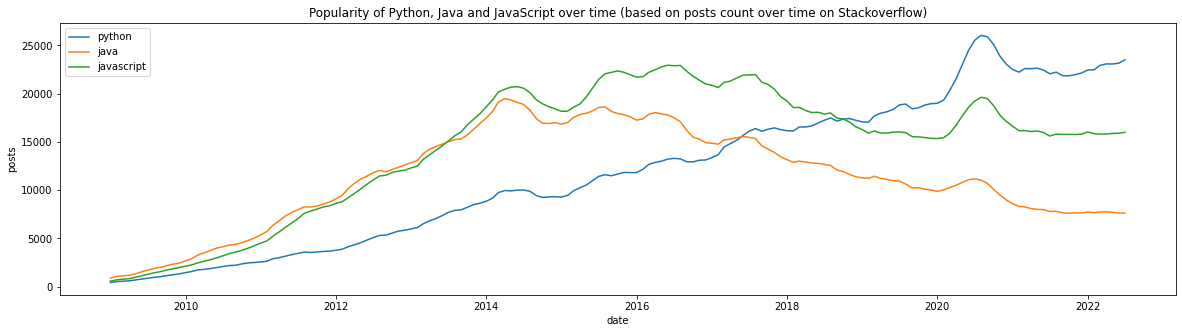

In [93]:
plt.plot(python_data.posts.rolling(6).mean(), label='python')
plt.plot(java_data.posts.rolling(6).mean(), label='java')
plt.plot(javascript_data.posts.rolling(6).mean(), label='javascript')
plt.xlabel('date')
plt.ylabel('posts')
plt.title('Popularity of Python, Java and JavaScript over time (based on posts count over time on Stackoverflow)')
plt.legend()
plt.show()

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

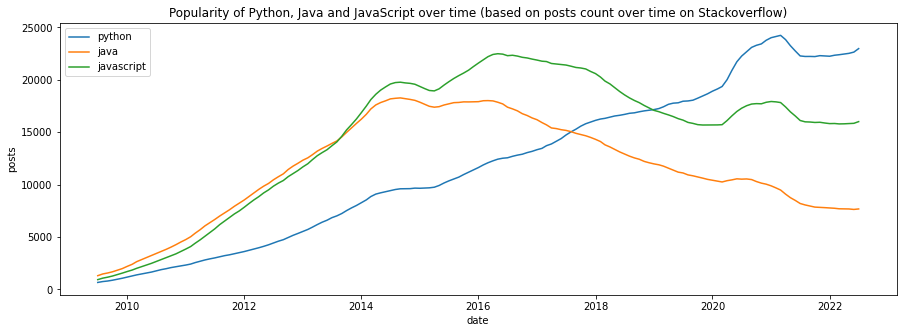

In [95]:
plt.plot(python_data.posts.rolling(12).mean(), label='python')
plt.plot(java_data.posts.rolling(12).mean(), label='java')
plt.plot(javascript_data.posts.rolling(12).mean(), label='javascript')
plt.xlabel('date')
plt.ylabel('posts')
plt.title('Popularity of Python, Java and JavaScript over time (based on posts count over time on Stackoverflow)')
plt.legend()
plt.show()

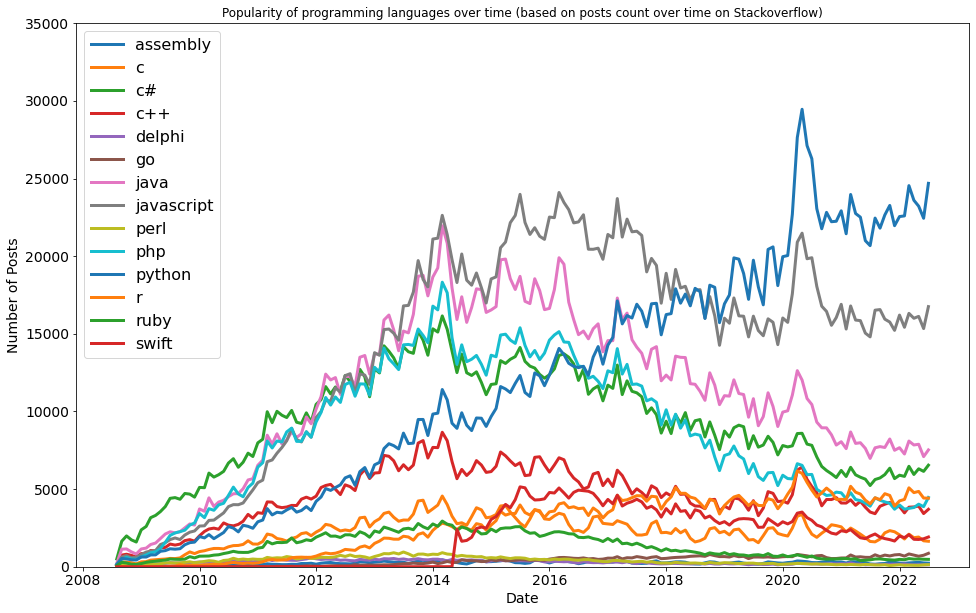

In [127]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.title('Popularity of programming languages over time (based on posts count over time on Stackoverflow)')

for column in df_pivot.columns:
    plt.plot(df_pivot.index, df_pivot[column], linewidth=3, label=df_pivot[column].name)

plt.legend(fontsize=16) 
plt.show()

In [129]:
rolled_df_pivot  = df_pivot.rolling(6).mean()
rolled_df_pivot.drop(columns='asse')

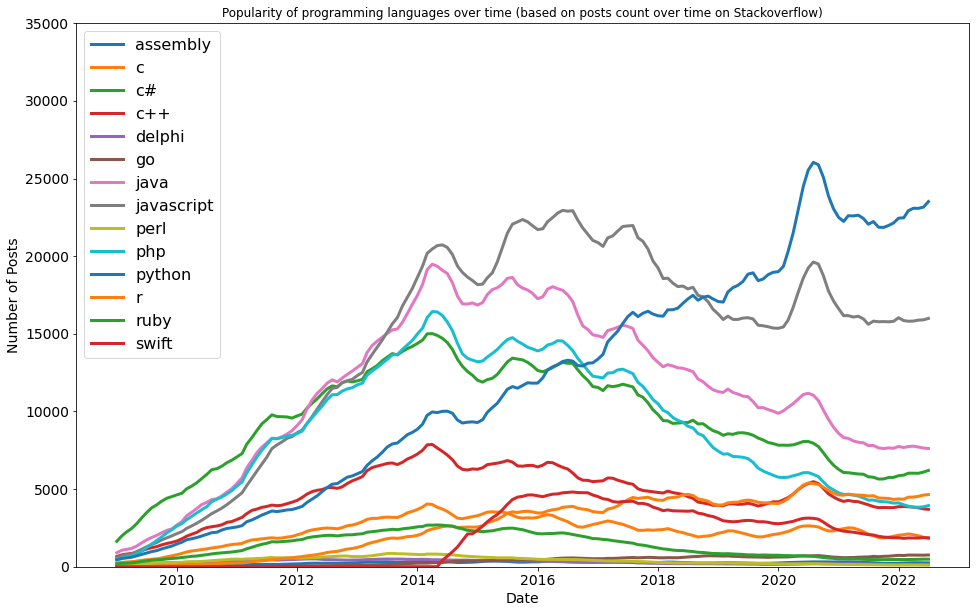

In [130]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.title('Popularity of programming languages over time (based on posts count over time on Stackoverflow)')

for column in rolled_df_pivot.columns:
    plt.plot(rolled_df_pivot.index, rolled_df_pivot[column], linewidth=3, label=rolled_df_pivot[column].name)

plt.legend(fontsize=16) 
plt.show()